In [2]:

!pip3 install tensorflow opencv-python mediapipe scikit-learn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
import cv2 
import numpy as np 
import os # easier to acess files
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # holistic model - make detections
mp_drawing = mp.solutions.drawing_utils # drawing utilities - draw detections




In [5]:
# image is a photo
# model is an mp_holisitic model

# Steps to use media pipe:
# 1. grab image and convert from bgr to rgb, then unwritable (saves memory)
# 2. make our detection
# 3. convert back to writeable and bgr



def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion
    # cv2Color converts images from one colorspace to another
    image.flags.writeable = False
    results = model.process(image) # make prediction from image grame
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion
    return image, results

In [6]:
# draws landmarks on photos

#draw_landmarks is helper function that makes it easy to draw onto image
# needs image, landmarks, and what type of connections you want to use
# POSE and FACE connections will provide map for different landmarks
# NOTE: applies landmark drawings to image in place


def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw right hand connections


In [21]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1)) # draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [22]:
# code to access openCV


cap = cv2.VideoCapture(0) # access video cam on device port 0

# with is used to handle resource management
# set mediapipe model

# min detection is initial detection, tracking confidence is preceding tracking confidence
# if you want higher inital confidence in answer, then increase it and vice versa
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
	while cap.isOpened(): # while camera is on

		# Read feed (reading frame from webcam)
		ret, frame = cap.read()

		# make detections
		image, results = mediapipe_detection(frame, holistic)
		print(results)

		# draw landmarks
		draw_styled_landmarks(image, results)

		# show frame to screen
		cv2.imshow('OpenCV Feed', image)
		
		# break gracefully
		if cv2.waitKey(1) & 0xFF == ord('q'):
			break

# release cv2 and close all windows
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

I0000 00:00:1705792025.113624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


2024-01-20 15:07:05.403 Python[86195:3559163] mac-virtualcam(DAL): PlugIn unhandled hasPropertyWithAddress for Unknown selector: ddsc


: 

In [8]:
draw_landmarks(frame, results)

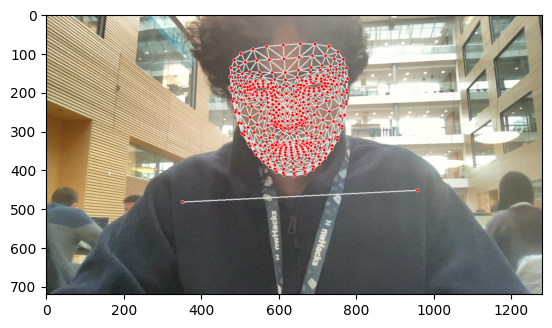

In [9]:

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
# diffe
results.face_landmarks

landmark {
  x: 0.49218166
  y: 0.45876384
  z: -0.017214056
}
landmark {
  x: 0.48809174
  y: 0.40050346
  z: -0.051947184
}
landmark {
  x: 0.48971558
  y: 0.41286966
  z: -0.022283519
}
landmark {
  x: 0.47726485
  y: 0.3344916
  z: -0.046538807
}
landmark {
  x: 0.4871315
  y: 0.38246122
  z: -0.057678558
}
landmark {
  x: 0.48637727
  y: 0.3553112
  z: -0.057000555
}
landmark {
  x: 0.4850303
  y: 0.2841555
  z: -0.039460763
}
landmark {
  x: 0.4140573
  y: 0.27548188
  z: 0.0021724177
}
landmark {
  x: 0.4834127
  y: 0.23514321
  z: -0.040104356
}
landmark {
  x: 0.48230052
  y: 0.20964168
  z: -0.04639536
}
landmark {
  x: 0.47820795
  y: 0.11040281
  z: -0.050661754
}
landmark {
  x: 0.49271384
  y: 0.46781707
  z: -0.014421452
}
landmark {
  x: 0.49331343
  y: 0.4733263
  z: -0.009857592
}
landmark {
  x: 0.49375555
  y: 0.47429723
  z: -0.0044836015
}
landmark {
  x: 0.49404803
  y: 0.47657567
  z: -0.0016605945
}
landmark {
  x: 0.49436688
  y: 0.4851001
  z: -0.0021649282
}